# <b> Uber Rides Data Analysis </b>

## Listing All The Datasets

In [15]:
import glob, os
data_dir = "../Datasets/"
files = sorted(glob.glob(os.path.join(data_dir, "*.csv")))
files

['../Datasets\\Uber-Jan-Feb-FOIL.csv',
 '../Datasets\\other-American_B01362.csv',
 '../Datasets\\other-Carmel_B00256.csv',
 '../Datasets\\other-Dial7_B00887.csv',
 '../Datasets\\other-Diplo_B01196.csv',
 '../Datasets\\other-FHV-services_jan-aug-2015.csv',
 '../Datasets\\other-Federal_02216.csv',
 '../Datasets\\other-Firstclass_B01536.csv',
 '../Datasets\\other-Highclass_B01717.csv',
 '../Datasets\\other-Lyft_B02510.csv',
 '../Datasets\\other-Prestige_B01338.csv',
 '../Datasets\\other-Skyline_B00111.csv',
 '../Datasets\\uber-raw-data-apr14.csv',
 '../Datasets\\uber-raw-data-aug14.csv',
 '../Datasets\\uber-raw-data-janjune-15.csv',
 '../Datasets\\uber-raw-data-jul14.csv',
 '../Datasets\\uber-raw-data-jun14.csv',
 '../Datasets\\uber-raw-data-may14.csv',
 '../Datasets\\uber-raw-data-sep14.csv']

## Data Selection
**Using uber-raw-data-janjune-15.csv as the primary dataset because it covers 6 months (Jan → Jun 2015), which is ideal for time-series patterns, weekday/weekend comparisons, and seasonal checks.**

In [19]:
import pandas as pd

fn = "../Datasets/uber-raw-data-janjune-15.csv"
df = pd.read_csv(fn)

# Quick inspections
print("Columns:", df.columns.tolist())
display(df.head())
df.info()
display(df.describe(include='all'))

Columns: ['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num', 'locationID']


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
count,14270479,14270479,14108284,1.427048e+07
unique,8,2744783,284,NaN
top,B02764,2015-06-27 22:19:00,B02764,NaN
freq,5753653,213,4352321,NaN
mean,NaN,NaN,NaN,1.520574e+02
std,NaN,NaN,NaN,7.159620e+01
min,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,9.200000e+01
50%,NaN,NaN,NaN,1.570000e+02
75%,NaN,NaN,NaN,2.300000e+02


In [21]:
# Parse datetime
dt_col = None
for c in df.columns:
    if 'date' in c.lower() or 'time' in c.lower():
        dt_col = c
        break
print("Using datetime column:", dt_col)

df[dt_col] = pd.to_datetime(df[dt_col])
# Feature engineering
df['date'] = df[dt_col].dt.date
df['hour'] = df[dt_col].dt.hour
df['weekday'] = df[dt_col].dt.day_name()
df['month'] = df[dt_col].dt.month

# Quick checks
print("Rows:", len(df))
print("Date range:", df[dt_col].min(), "to", df[dt_col].max())
df.isna().sum()

Using datetime column: Pickup_date
Rows: 14270479
Date range: 2015-01-01 00:00:05 to 2015-06-30 23:59:00


Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     162195
locationID                   0
date                         0
hour                         0
weekday                      0
month                        0
dtype: int64

C:\Users\anubh\AppData\Local\Temp\ipykernel_4492\1389124784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='rides', data=rides_per_month, palette='Blues_d')


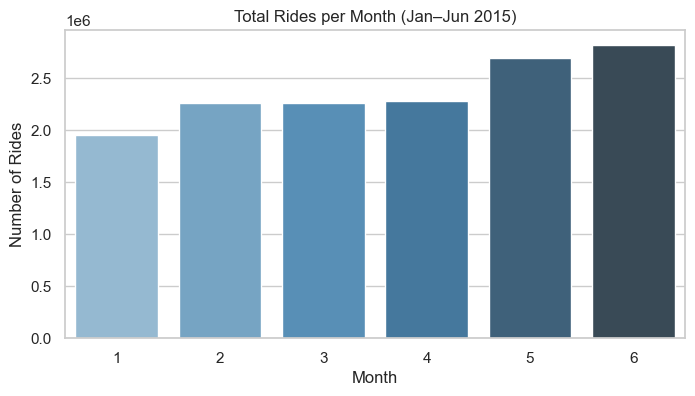

In [27]:
# 1. Rides per month
rides_per_month = df.groupby('month').size().reset_index(name='rides')
plt.figure(figsize=(8,4))
sns.barplot(x='month', y='rides', data=rides_per_month, palette='Blues_d')
plt.title('Total Rides per Month (Jan–Jun 2015)')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

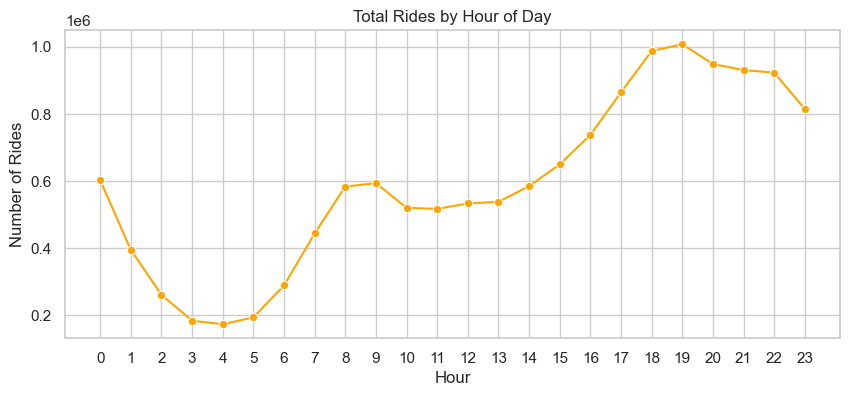

In [52]:
# 2. Rides per hour of the day
rides_per_hour = df.groupby('hour').size().reset_index(name='rides')
plt.figure(figsize=(10,4))
sns.lineplot(x='hour', y='rides', data=rides_per_hour, marker='o', color='orange')
plt.title('Total Rides by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.xticks(range(0,24))
plt.show()

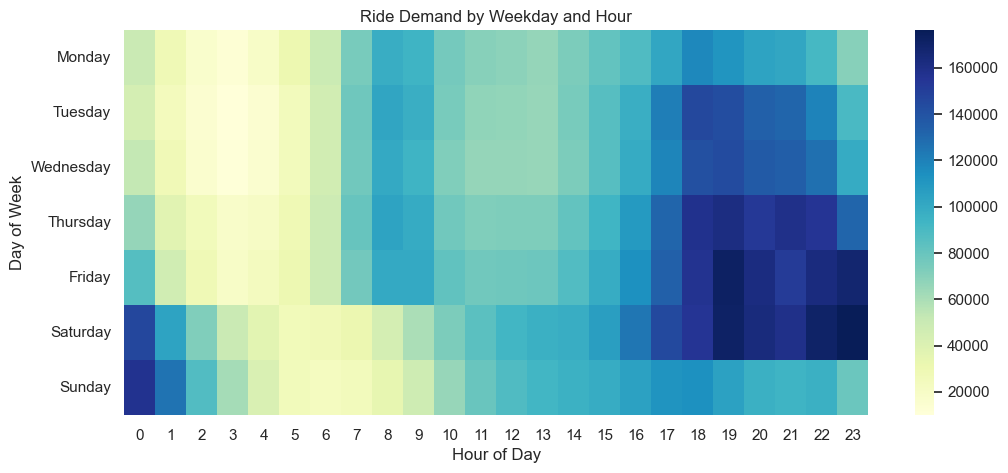

In [31]:
# 3. Weekday vs Hour heatmap
heat = df.groupby(['weekday','hour']).size().unstack(fill_value=0)
ordered = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heat = heat.reindex(ordered)
plt.figure(figsize=(12,5))
sns.heatmap(heat, cmap='YlGnBu')
plt.title('Ride Demand by Weekday and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

C:\Users\anubh\AppData\Local\Temp\ipykernel_4492\1109235539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_bases.index, x=top_bases.values, palette="viridis")


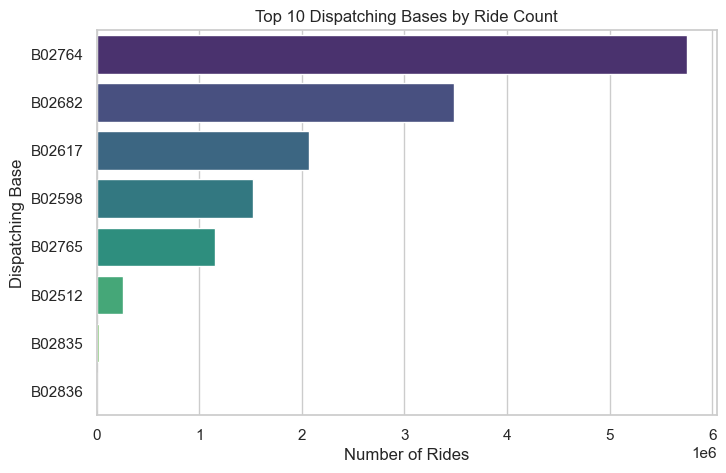

In [33]:
# Top 10 Dispatching Bases
top_bases = df['Dispatching_base_num'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(y=top_bases.index, x=top_bases.values, palette="viridis")
plt.title("Top 10 Dispatching Bases by Ride Count")
plt.xlabel("Number of Rides")
plt.ylabel("Dispatching Base")
plt.show()

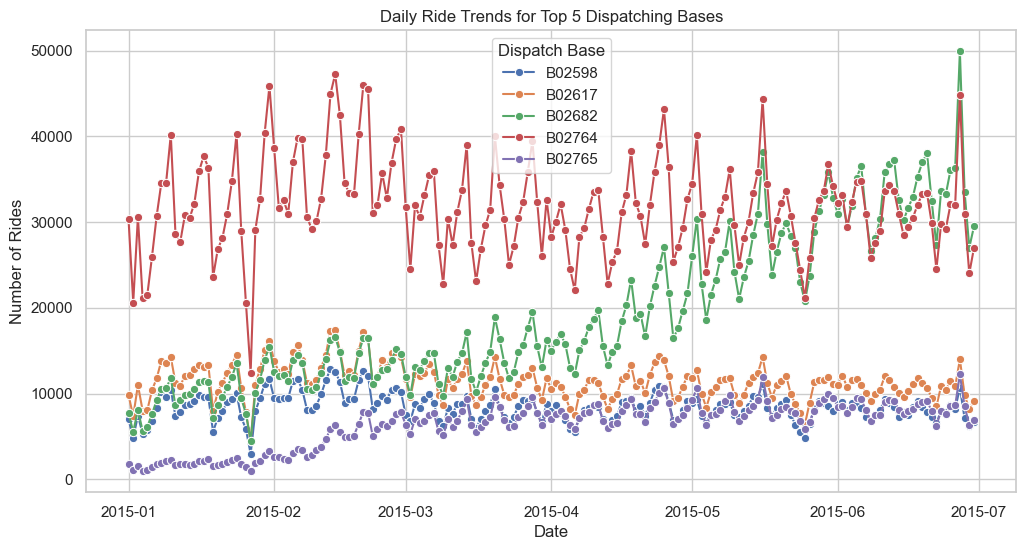

In [35]:
# Identify top 5 bases
top5_bases = df['Dispatching_base_num'].value_counts().head(5).index

# Filter only top 5 bases
df_top5 = df[df['Dispatching_base_num'].isin(top5_bases)]

# Group by date and base
rides_by_base = df_top5.groupby(['date', 'Dispatching_base_num']).size().reset_index(name='rides')

plt.figure(figsize=(12,6))
sns.lineplot(data=rides_by_base, x='date', y='rides', hue='Dispatching_base_num', marker="o")
plt.title("Daily Ride Trends for Top 5 Dispatching Bases")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.legend(title='Dispatch Base')
plt.show()

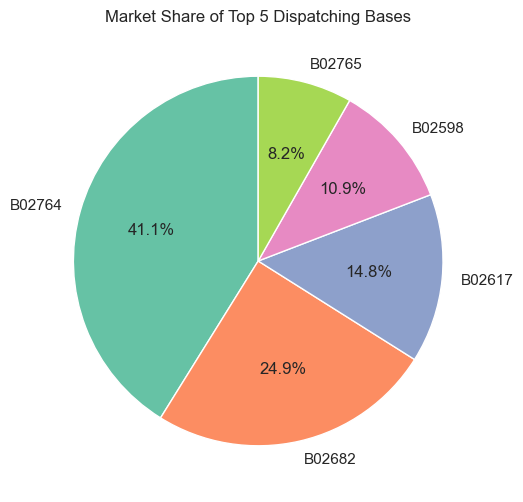

In [37]:
base_share = df['Dispatching_base_num'].value_counts(normalize=True).head(5) * 100
plt.figure(figsize=(6,6))
plt.pie(base_share.values, labels=base_share.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title("Market Share of Top 5 Dispatching Bases")
plt.show()

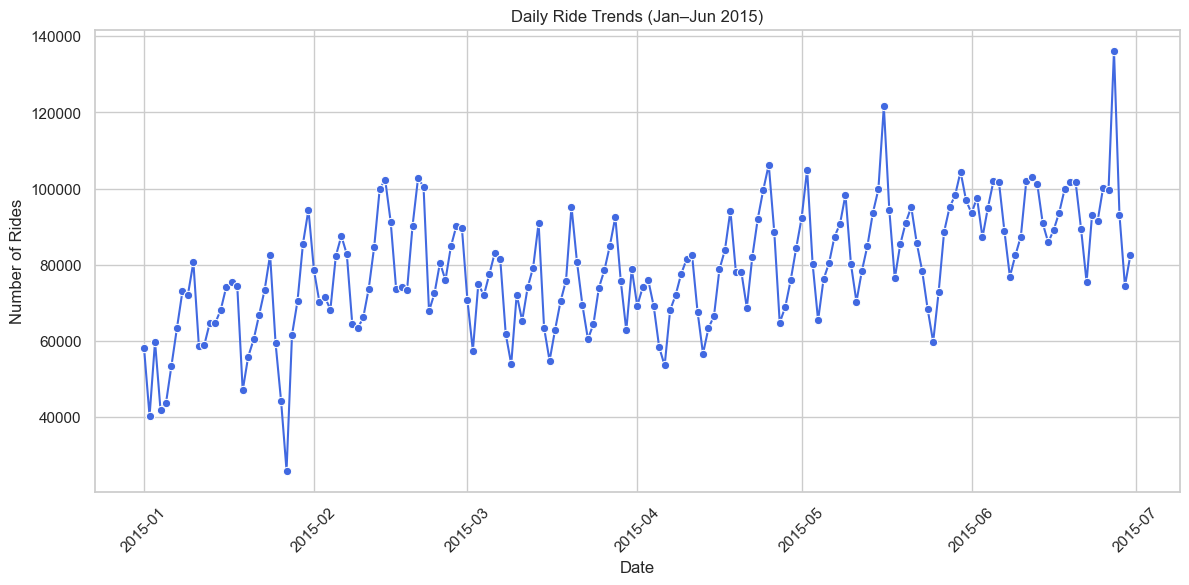

In [39]:
# Daily ride counts
rides_per_day = df.groupby('date').size().reset_index(name='rides')

plt.figure(figsize=(14,6))
sns.lineplot(data=rides_per_day, x='date', y='rides', marker="o", color='royalblue')
plt.title("Daily Ride Trends (Jan–Jun 2015)")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

C:\Users\anubh\AppData\Local\Temp\ipykernel_4492\237429851.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rides_per_weekday, x='weekday', y='rides', palette='mako')


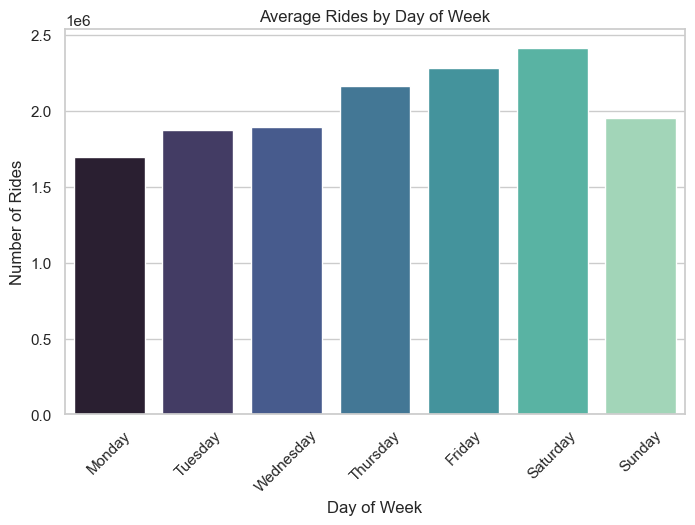

In [43]:
# Weekday ride counts (ordered Mon–Sun)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_per_weekday = df.groupby('weekday').size().reindex(weekday_order).reset_index(name='rides')

plt.figure(figsize=(8,5))
sns.barplot(data=rides_per_weekday, x='weekday', y='rides', palette='mako')
plt.title("Average Rides by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

C:\Users\anubh\AppData\Local\Temp\ipykernel_4492\887084999.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekend_rides, x='day_type', y='rides', palette='Set2')


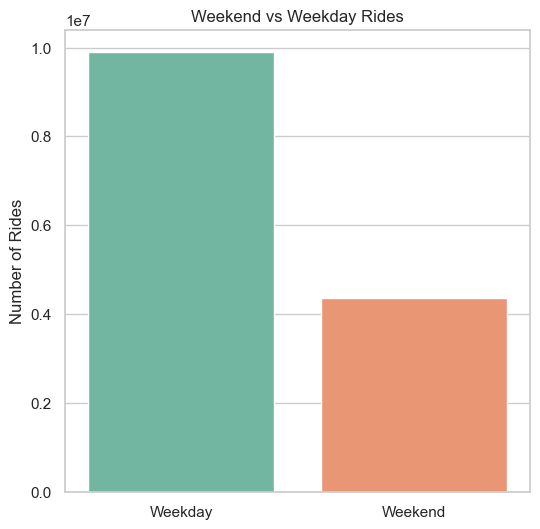

In [45]:
# Create weekend flag
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])

weekend_rides = df.groupby('is_weekend').size().reset_index(name='rides')
weekend_rides['day_type'] = weekend_rides['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

plt.figure(figsize=(6,6))
sns.barplot(data=weekend_rides, x='day_type', y='rides', palette='Set2')
plt.title("Weekend vs Weekday Rides")
plt.xlabel("")
plt.ylabel("Number of Rides")
plt.show()

In [47]:
print("📌 KEY INSIGHTS FROM EDA")
print("="*40)

# Peak hours
peak_hour = df['hour'].value_counts().idxmax()
print(f"1. Peak hour for rides: {peak_hour}:00 hrs")

# Busiest day of week
busiest_day = df['weekday'].value_counts().idxmax()
print(f"2. Busiest day of the week: {busiest_day}")

# Top dispatch base
top_base = df['Dispatching_base_num'].value_counts().idxmax()
print(f"3. Top dispatching base: {top_base}")

# Month with highest rides
top_month = df['month'].value_counts().idxmax()
print(f"4. Month with highest rides: {top_month} (1=Jan)")

# Weekend vs weekday split
weekend_pct = (df['is_weekend'].sum() / len(df) * 100)
print(f"5. {weekend_pct:.1f}% of rides occur on weekends")

print("\nThese insights will guide further Power BI visuals and storytelling.")

📌 KEY INSIGHTS FROM EDA
1. Peak hour for rides: 19:00 hrs
2. Busiest day of the week: Saturday
3. Top dispatching base: B02764
4. Month with highest rides: 6 (1=Jan)
5. 30.6% of rides occur on weekends

These insights will guide further Power BI visuals and storytelling.


In [49]:
# Select useful columns
df_export = df[['Pickup_date', 'Dispatching_base_num', 'Affiliated_base_num',
                'locationID', 'date', 'hour', 'weekday', 'month', 'is_weekend']]

# Save to CSV in Datasets folder for Power BI
export_path = "../Datasets/uber_cleaned.csv"
df_export.to_csv(export_path, index=False)

print(f"✅ Cleaned dataset exported to: {export_path}")

✅ Cleaned dataset exported to: ../Datasets/uber_cleaned.csv


# Uber Rides Jan–Jun 2015 — EDA Summary

**Skills Used**: Python, Pandas, Seaborn, Matplotlib  
**Dataset Size**: 14.27M rows (Jan–Jun 2015)  

**Highlights**:
- Identified peak hours, days, and months for rides
- Analyzed dispatch base performance & market share
- Discovered weekday/weekend demand differences
- Prepared cleaned dataset for Power BI dashboard

**Next Step**: Build an **interactive Power BI dashboard** with KPIs, time-series charts, and geospatial analysis using the cleand dataset.
